In [1]:
#importing libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset

df =  pd.read_csv('C:\\Users\\Dell\\Evaluation Project\\Insurance Claim Fraud Detection\\Automobile_insurance_fraud.csv')

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.shape

(1000, 40)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
df.dtypes.value_counts()

object     21
int64      17
float64     2
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [8]:
# Dropping columns 
df.drop('_c39',axis=1,inplace=True)

In [9]:
#checking missing values
def missing_values_table(df):
        # Total missing value
        mis_val = df.isnull().sum()
        
        # Percentage of missing value
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the result
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the column
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [10]:
# Statistics of Missing values
missing_values = missing_values_table(df)
missing_values

Your selected dataframe has 39 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [11]:
#checking null values

df.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [12]:
# lable enconding for more features 

le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in df:
    if df[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(df[col].unique())) <= 2:
            # Train on the training data
            le.fit(df[col])
            # Transform both training and testing data
            df[col] = le.transform(df[col])
            
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

2 columns were label encoded.


<AxesSubplot:>

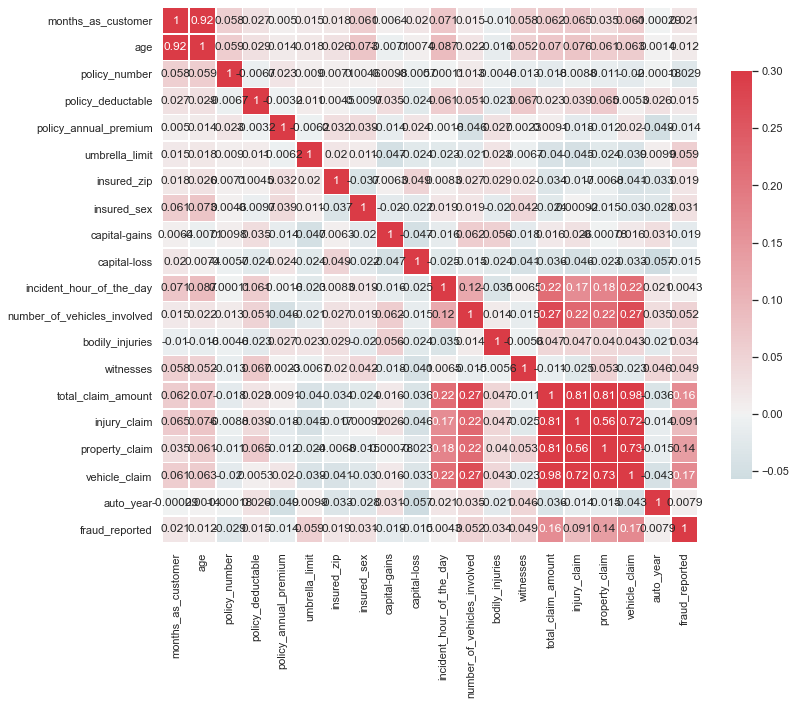

In [13]:
#correlation

sns.set(style="white")

#matplotlib figure
f, ax = plt.subplots(figsize=(12, 15))

#custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(df.corr(), cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [14]:
#variables
colum_name =[]
unique_value=[]

In [15]:
# Iterate through the columns
for col in df:
    if df[col].dtype == 'object':
        # If 2 or fewer unique categories
        colum_name.append(str(col)) 
        unique_value.append(df[col].nunique())
table= pd.DataFrame()
table['Col_name'] = colum_name
table['Value']= unique_value
            
table=table.sort_values('Value',ascending=False)
table

,Col_name,Value
14,incident_location,1000
0,policy_bind_date,951
7,incident_date,60
18,auto_model,39
5,insured_hobbies,20
4,insured_occupation,14
17,auto_make,14
3,insured_education_level,7
12,incident_state,7
13,incident_city,7


In [16]:
#droping columns

df.drop(['incident_location','policy_bind_date','incident_date','auto_model','insured_occupation','policy_number'],axis=1,inplace=True)

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

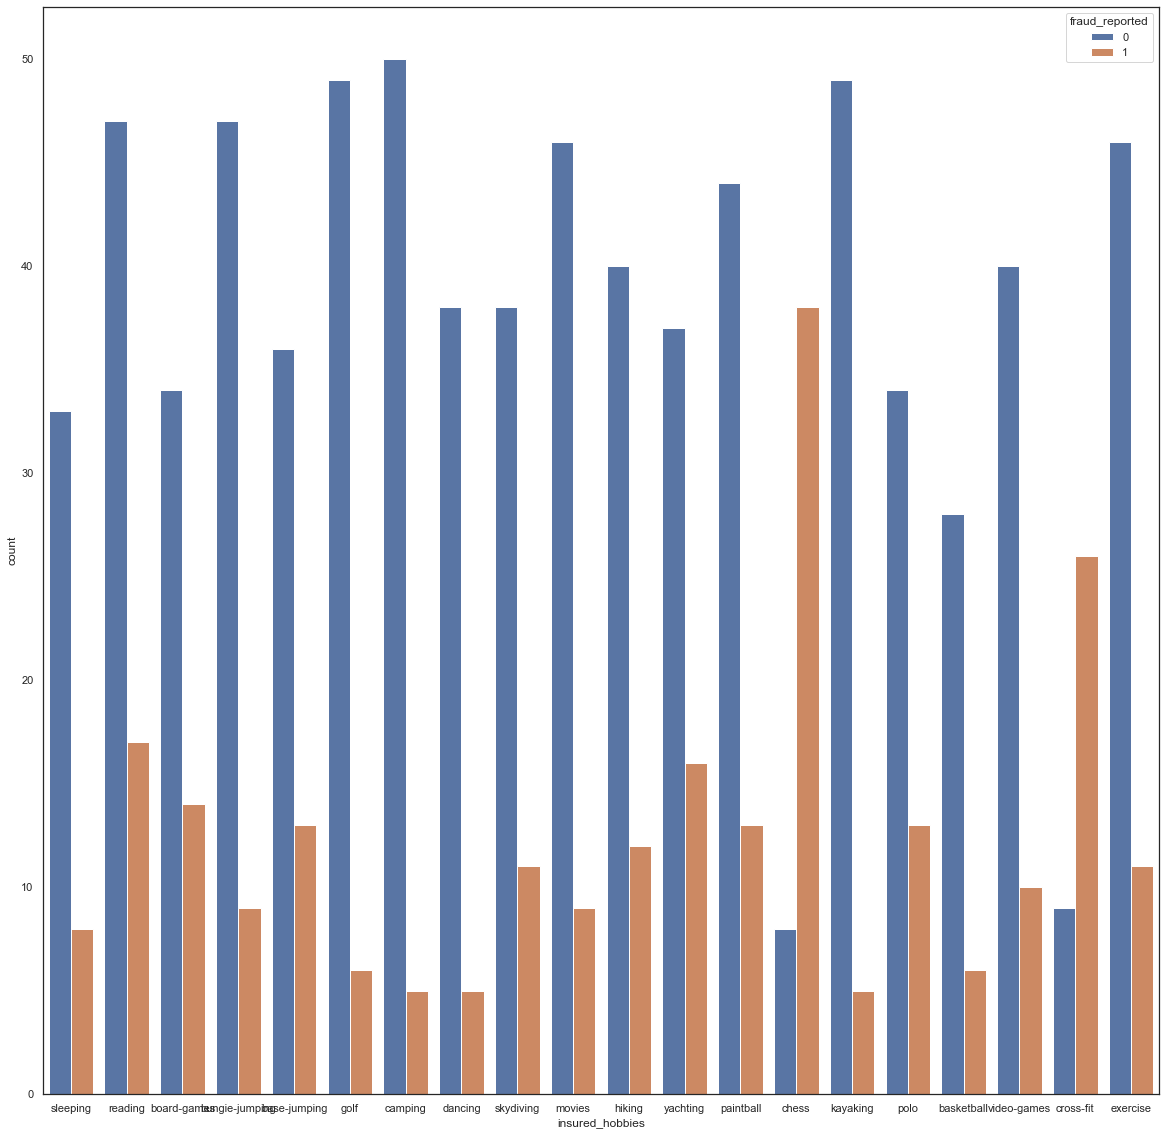

In [17]:
f, ax = plt.subplots(figsize=(20, 20))
sns.countplot(x='insured_hobbies',hue='fraud_reported',data=df)

In [18]:
#insured hobbies are not chess and correct fit
df['insured_hobbies']=df['insured_hobbies'].apply(lambda x :'Other' if x!='chess' and x!='cross-fit' else x)

<AxesSubplot:xlabel='auto_make', ylabel='count'>

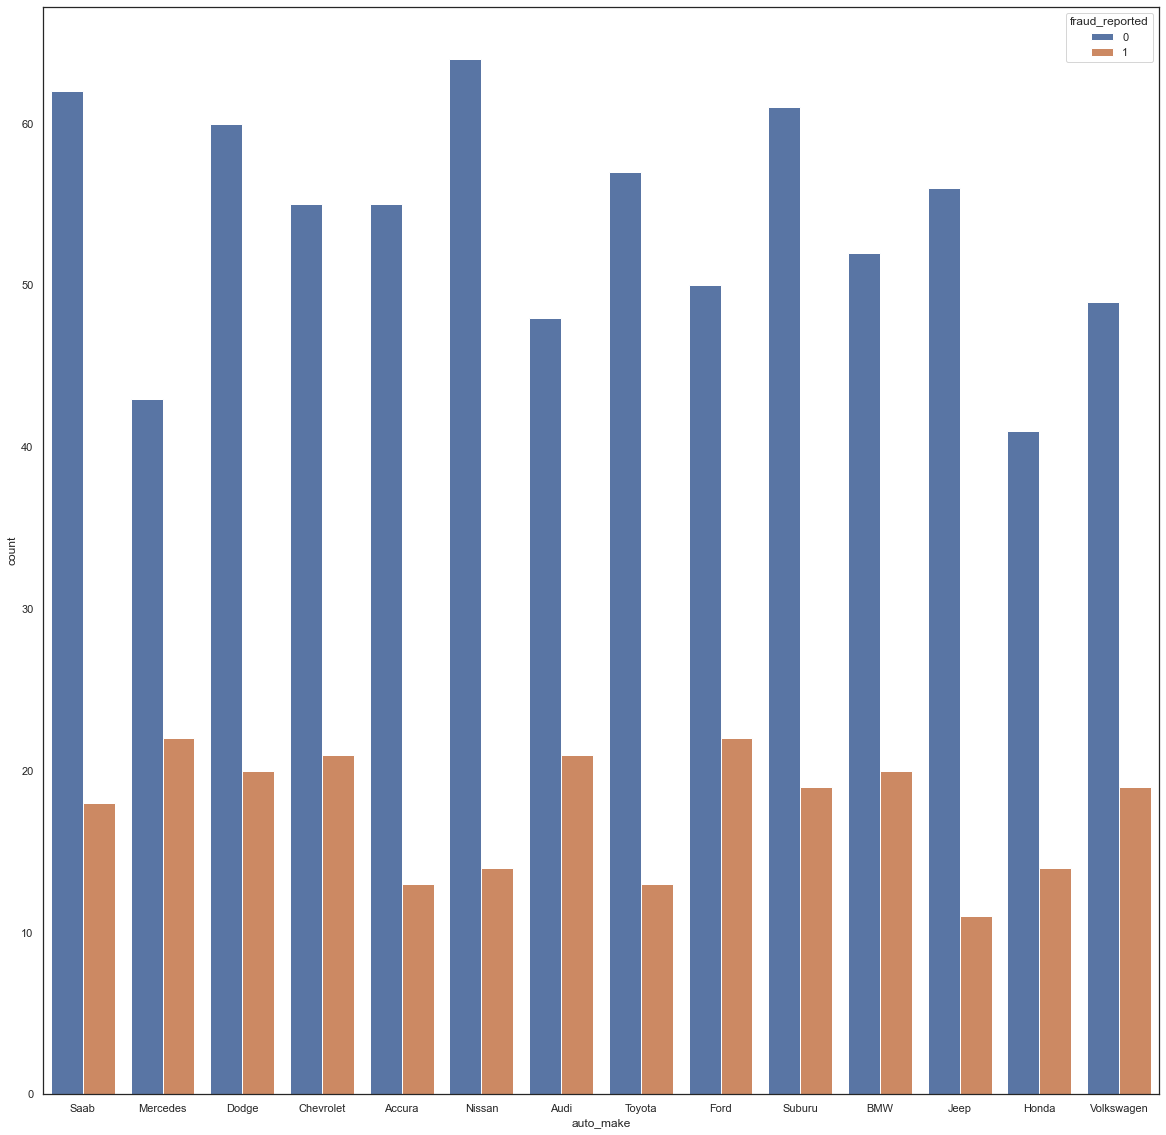

In [19]:
f, ax = plt.subplots(figsize=(20, 20))
sns.countplot(x='auto_make',hue='fraud_reported',data=df)

In [20]:
df['insured_hobbies'].unique()

array(['Other', 'chess', 'cross-fit'], dtype=object)

In [21]:
data = pd.get_dummies(df)
print('Training Features shape: ', data.shape)

Training Features shape:  (1000, 92)


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

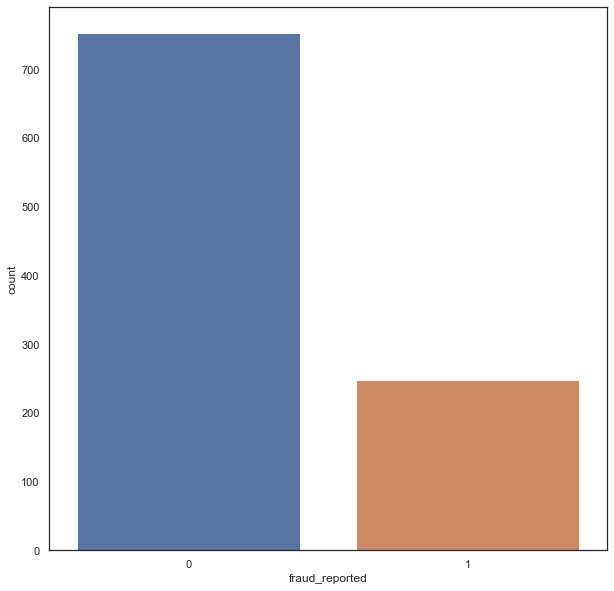

In [22]:
#checking for data balance
f, ax = plt.subplots(figsize=(10, 10))
sns.countplot(x='fraud_reported',data=data)

In [23]:
#As we see the abve graph, data is imbalanced

In [24]:
# let's split the data into dependent and independent sets

x = data.drop(['fraud_reported'], axis = 1)
y = data['fraud_reported']

print("Shape of x :", x.shape)
print("Shape of y :", y.shape)

Shape of x : (1000, 91)
Shape of y : (1000,)


In [25]:
# let's split the dataset into train and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (800, 91)
Shape of x_test : (200, 91)
Shape of y_train : (800,)
Shape of y_test : (200,)


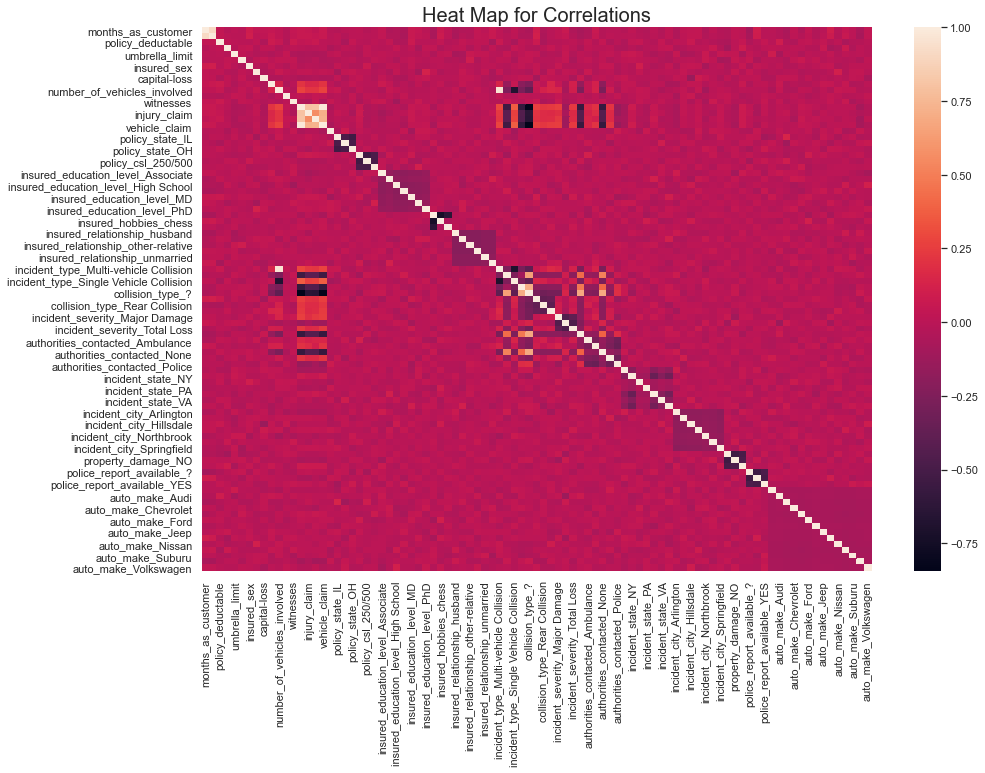

In [29]:
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(x_train.corr())
plt.title('Heat Map for Correlations', fontsize = 20)
plt.show()

In [30]:
#modeling

In [31]:
# Random Forest Classifier

from imblearn.ensemble import BalancedRandomForestClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [41]:
model = BalancedRandomForestClassifier(n_estimators = 100, random_state = 0)

model.fit(x_train, y_train)
y_pred_rf = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred_rf)
print(cr)

Training Accuracy:  0.89
Testing Accuarcy:  0.85
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       143
           1       0.70      0.82      0.76        57

    accuracy                           0.85       200
   macro avg       0.81      0.84      0.82       200
weighted avg       0.86      0.85      0.85       200



In [42]:
# Decision tree

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

DecisionTreeModel = DecisionTreeClassifier(random_state=1)
DecisionTreeModel.fit(x_train, y_train)
y_decTree = model.predict(x_test)

print("Training accuracy:", DecisionTreeModel.score(x_train, y_train))
print('Testing Accuarcy: ', DecisionTreeModel.score(x_test, y_test))

#making a report
report = classification_report(y_test, predict_y)
print(report)

Training accuracy: 1.0
Testing Accuarcy:  0.79
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       143
           1       0.68      0.49      0.57        57

    accuracy                           0.79       200
   macro avg       0.75      0.70      0.72       200
weighted avg       0.78      0.79      0.78       200



In [48]:
# random forest

from sklearn.ensemble import RandomForestClassifier

RandomForestModel = RandomForestClassifier(random_state=1)
RandomForestModel.fit(x_train, y_train)
predict = RandomForestModel.predict(x_test)

print("Training accuracy:", RandomForestModel.score(x_train, y_train))
print('Testing Accuarcy: ', RandomForestModel.score(x_test, y_test))

#making a report
report3 = classification_report(y_test, predict_y)
print(report3)

Training accuracy: 1.0
Testing Accuarcy:  0.775
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       143
           1       0.68      0.49      0.57        57

    accuracy                           0.79       200
   macro avg       0.75      0.70      0.72       200
weighted avg       0.78      0.79      0.78       200



In [49]:
# Hence, Random forest got 85% accuracy it is the best models.

In [50]:
#saving model
import joblib

joblib.dump (cr, 'finalmodel.pkl')

['finalmodel.pkl']